In [1]:
import numpy as np
import matplotlib.pyplot as plt

# np.random.seed(42)

In [2]:
class Bandit:
    def __init__(self, num_arms, initial_radius=2):
        self.num_arms = num_arms
        self.arm_means = np.random.uniform(-initial_radius, initial_radius, self.num_arms)
    
    def pull_arm(self, arm : int):
        return np.random.normal(self.arm_means[arm], 1)

    def shuffle(self, sd=0.01):
        increment = np.random.normal(0, sd, self.num_arms)
        self.arm_means += increment

myBandit = Bandit(5)
myBandit.arm_means

array([-0.12068644,  0.88097486,  1.15403069,  0.73458208, -1.77754673])

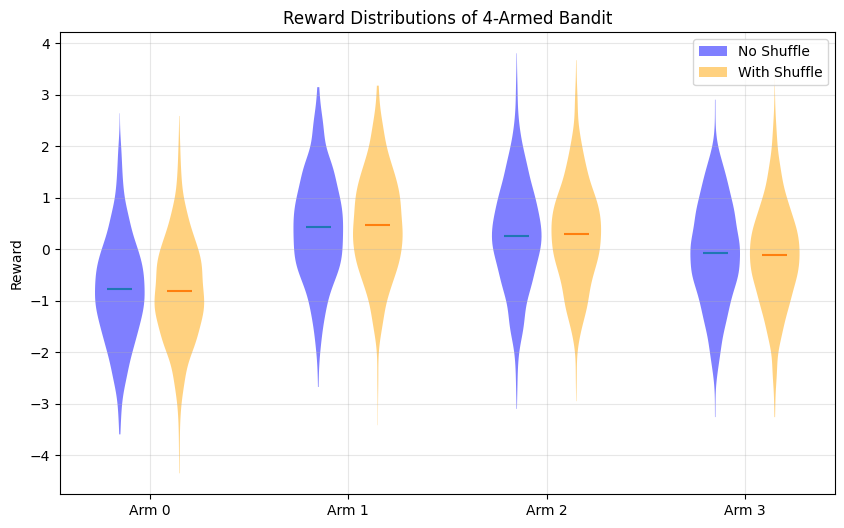

In [3]:
from matplotlib.patches import Patch

bandit = Bandit(num_arms=4, initial_radius=1)
num_pulls = 1000

# rewards no shuffle
rewards_no_shuffling = []
for arm in range(bandit.num_arms):
    rewards_no_shuffling.append([bandit.pull_arm(arm) for _ in range(num_pulls)])

# rewards with shuffle
rewards_with_shuffling = []
for arm in range(bandit.num_arms):
    rewards_with_shuffling.append([bandit.pull_arm(arm) for _ in range(num_pulls)])
    bandit.shuffle()

fig, ax = plt.subplots(figsize=(10, 6))
positions = np.arange(1, bandit.num_arms + 1)

# no shuffle
parts1 = ax.violinplot(rewards_no_shuffling, positions=positions - 0.15, widths=0.25,
                       showmeans=True, showextrema=False, showmedians=False)

# with shuffle
parts2 = ax.violinplot(rewards_with_shuffling, positions=positions + 0.15, widths=0.25,
                       showmeans=True, showextrema=False, showmedians=False)

for pc in parts1['bodies']:
    pc.set_facecolor('blue')
    pc.set_alpha(0.5)
for pc in parts2['bodies']:
    pc.set_facecolor('orange')
    pc.set_alpha(0.5)

# legend
legend_elements = [
    Patch(facecolor='blue', alpha=0.5, label='No Shuffle'),
    Patch(facecolor='orange', alpha=0.5, label='With Shuffle')
]
ax.legend(handles=legend_elements, loc='upper right')

# labels
ax.set_xticks(positions)
ax.set_xticklabels([f"Arm {i}" for i in range(bandit.num_arms)])
ax.set_ylabel("Reward")
ax.set_title(f"Reward Distributions of {bandit.num_arms}-Armed Bandit")
ax.grid(alpha=0.3)